In [ ]:
import CapsNet
import numpy as np
from torchvision.transforms import ToPILImage
import os
import matplotlib.pyplot as plt

In [2]:
model = CapsNet.CapsNet.load_from_checkpoint('./HB_Capsnet_R_trained_model/checkpoints/_ckpt_epoch_24.ckpt')

Dataset: HB
Training Examples:  16,384
Validation Examples:  2,048


In [3]:
val_dataloader = model.val_dataloader()[0]

In [4]:
val_dataloader.dataset.classes

['boat', 'house', 'rectangle', 'triangle']

In [5]:
x, y = next(iter(val_dataloader))
x, y = x[:10], y[:10]

In [6]:
images = [ToPILImage()(img) for img in x]
labels = [val_dataloader.dataset.classes[label] for label in y]

In [7]:
output = model(x, y)

In [8]:
predictions = output['predictions']
reconstructions = output['reconstructions']
reconstructions = reconstructions.view(x.shape)

In [9]:
recon_images = [ToPILImage()(recon) for recon in reconstructions]

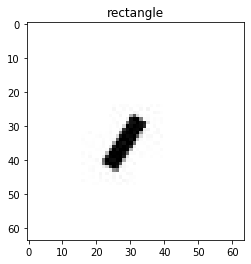

In [27]:
i=3
plt.imshow(images[i],"Greys")
# plt.imshow(recon_images[i],cmap="Greys")
plt.title(str(labels[i]))
plt.show()

In [ ]:
class_caps = output['class_caps']

In [ ]:
class_caps[0]

In [ ]:
class_probs = output['class_probs']

In [ ]:
class_probs

In [ ]:
val_dataloader.dataset.classes